# Library Imports

In [1]:
import pandas as pd

In [2]:
dfv = pd.read_csv("NYC_Restaurants.csv", dtype=str, index_col = 0)

In [3]:
dfv.shape

(44633, 18)

In [4]:
dfv.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [5]:
dfv.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection


# [Q1, 6 points] Create a unique name for each restaurant. 

On theDataFrame created above, add a new column to your DataFrame, called *RESTAURANT*, that combines 
**DBA, BUILDING, STREET, ZIPCODE, BORO** fields. 

For example, “WENDY’S 469 FLATBUSH AVENUE 11225 BROOKLYN”. 

Print the first 10 values of the RESTAURANT column of your DataFrame.

In [6]:
dfv["RESTAURANT"] = (dfv["DBA"] + " " + 
                     dfv["BUILDING"] + " " + 
                     dfv["STREET"] + " " +
                     dfv["ZIPCODE"] + " " + 
                     dfv["BORO"])

In [7]:
dfv["RESTAURANT"].head(10)

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

# [Q2, 6 points] How many restaurants are included in the data?

- A “Subway” in one particular address (i.e., building, street, zipcode, and boro) counts as one restaurant; don’t combine all Subways into one restaurant!
- The data can have multiple violations for the same restaurant!

In [8]:
unique_res = dfv.drop_duplicates(subset = ["RESTAURANT"])
unique_res.shape[0]

10114

# [Q3, 6 points] How many chains are there? 

Let us define a chain to be the same restaurant name occurring in at least two different (building, street, zipcode, boro) addresses (i.e., one DBA with multiple restaurant locations)

You’ll see multiple versions of the name ”DUNKIN DONUTS”. Just act as if they are different chains

In [9]:
(unique_res["DBA"].value_counts() > 1).sum()

368

# [Q4, 6 points] Plot a bar graph of the top 20 most popular chains.

We already have the chains from the previous problem. 

Count the number of restaurants for each chain as a measure of its popularity

<AxesSubplot:>

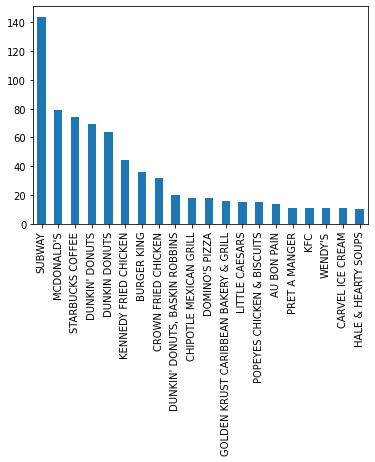

In [10]:
unique_res["DBA"].value_counts()[:20].plot(kind = "bar")

# [Q5, 6 points] What fraction of all restaurants are chain restaurants? 

You should think of a restaurant as being one restaurant at one location. 
So “Wendy’s 5th Street” and “Wendy’s on 10th Street” are two different restaurants. Essentially a restaurant is what you defined in Q1.

In [11]:
a = (unique_res["DBA"].value_counts() > 1)
res = a[a].index.values
unique_res[unique_res["DBA"].isin(res)]["DBA"].value_counts().sum() / len(dfv["RESTAURANT"].value_counts())

0.16472216729286138

# [Q6, 6 points] Plot the number of non-chain restaurants in each boro. 

First, we need to figure out all the non-chain restaurants, then select out only those restaurants, and finally plot the number of such restaurants
by boro. 
Make sure to look at the plot; we don’t want to see... oh... the “missing” boro.

In [12]:
non_chains = (unique_res["DBA"].value_counts() > 1) == False
non_chains = non_chains[non_chains].index.values

<AxesSubplot:>

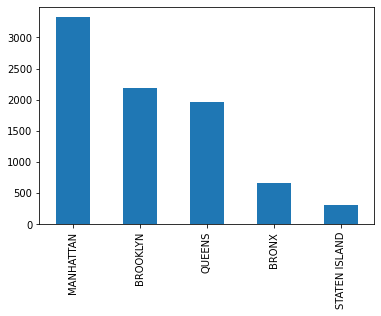

In [13]:
unique_res[(unique_res["DBA"].isin(non_chains)) & (unique_res["BORO"]!="Missing")]["BORO"].value_counts().plot(kind="bar")

# [Q7, 8 points] Plot the fraction of non-chain restaurants in each boro. 

The boro with the most non-chain restaurants might just be the boro with the most restaurants in general. 

If we want to find the boro that attracts the most “independent” restauranteurs, we must divide the number of non-chain restaurants by the total number of restaurants in the boro. Plot this.

Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants

In [14]:
all_res = unique_res[unique_res["BORO"] != "Missing"]["BORO"].value_counts()
non_chain_res = unique_res[(unique_res["DBA"].isin(non_chains)) & (unique_res["BORO"]!="Missing")]["BORO"].value_counts()

In [15]:
non_chain_res / all_res

MANHATTAN        0.830542
BROOKLYN         0.862001
QUEENS           0.847910
BRONX            0.770760
STATEN ISLAND    0.791878
Name: BORO, dtype: float64

<AxesSubplot:>

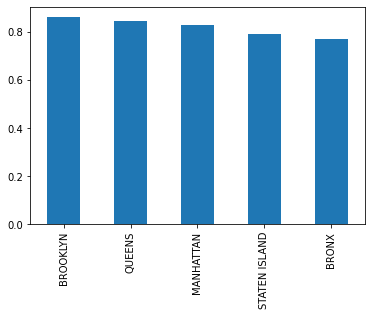

In [34]:
(non_chain_res / all_res).sort_values(ascending = False).plot(kind="bar")

#### Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants ?

No, As evident from the above 2 graphs, Manhattan has maximum non-chain restaurants where Brooklyn has maximum percentage of non-chain restaurants

# [Q8, 6 points] Plot the popularity of cuisines. Which cuisines are the most well-represented among all restaurants? 

Define the popularity of a cuisine as the number of restaurants serving that cuisine. Plot the popularity of the top 20 cuisines.

<AxesSubplot:>

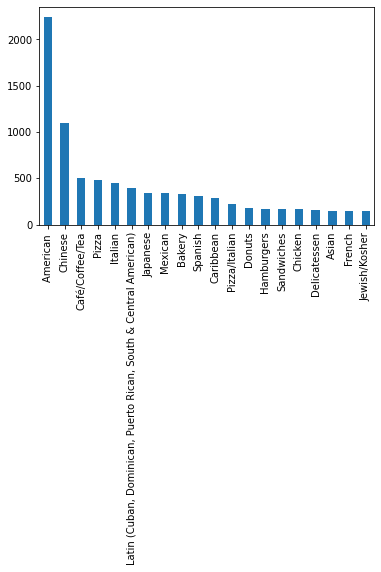

In [17]:
unique_res["CUISINE DESCRIPTION"].value_counts()[:20].plot(kind="bar")

# [Q9, 9 points] Plot the cuisines among restaurants which never got cited for violations. 

Ideally, you should explore and see what happens
when there is no violation, but here I will just tell you: the ’VIOLATION CODE’ field is missing.

First, find the restaurants that were never cited for a code violation. The compute the popularity of each cuisine among these “clean” restaurants. Plot the popularity of the top-20 among these cuisines.

<AxesSubplot:>

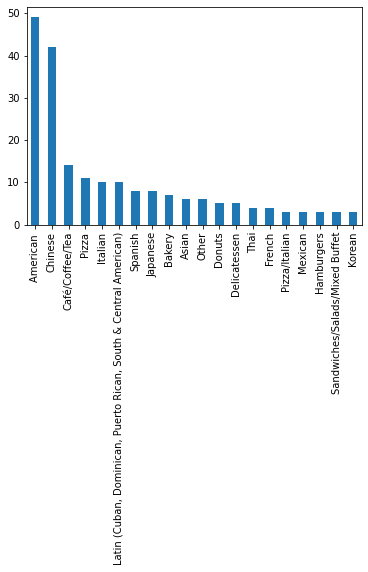

In [37]:
res_viol_unique = dfv.drop_duplicates(subset = ["RESTAURANT", "VIOLATION CODE"])["RESTAURANT"].value_counts()
res_viol_unique_res = res_viol_unique[res_viol_unique == 1].index.values
unique_res[unique_res["RESTAURANT"].isin(res_viol_unique_res) & unique_res["VIOLATION CODE"].isnull()]["CUISINE DESCRIPTION"].value_counts()[:20].plot(kind="bar")

# Q10, 6 points] What cuisines tend to be the “cleanest”?

- Select all cuisines for which there were at least 20 restaurants representing that cuisine.
- For each such cuisine, compute the ratio of the counts in Q9 to Q8.

- This is the ratio of restaurants that never got cited, versus total number of restaurants, for each cuisine.

Find the top-10 cuisines with the highest ratios; these are that cuisines
whose restaurants are “most likely to be clean.

In [19]:
a = unique_res["CUISINE DESCRIPTION"].value_counts() >= 20
cuisines_20_res = a[a].index.values

In [20]:
q9 = unique_res[unique_res["RESTAURANT"].isin(res_viol_unique_res) & unique_res["VIOLATION CODE"].isnull()]["CUISINE DESCRIPTION"].value_counts()
q9.sort_index(inplace=True)

In [41]:
q8 = unique_res[unique_res["CUISINE DESCRIPTION"].isin(cuisines_20_res)]["CUISINE DESCRIPTION"].value_counts()
q8.sort_index(inplace=True)

In [43]:
(q9/q8).dropna().sort_values(ascending = False)[:10]

Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64

<AxesSubplot:>

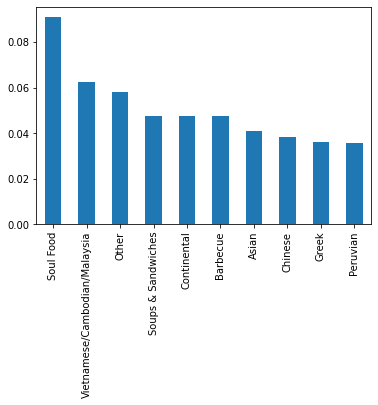

In [44]:
(q9/q8).dropna().sort_values(ascending = False)[:10].plot(kind='bar')

# [Q11, 8 points] What are the most common violations in each borough? 

Create a table of the number of times each violation description was observed in each borough, and figure out the most common violation description for each borough.

To create the table, check out the crosstab function. We will see a more general version of this when we discuss groupby in class. Once you do have the table, you will still need to find the most common
violation description for each borough.

In [23]:
no_viol = dfv[dfv["VIOLATION CODE"].notnull()]
no_viol = no_viol[no_viol["BORO"] != "Missing"]
# a = no_viol.groupby(["BORO", 'VIOLATION DESCRIPTION'], as_index=False).agg({"RESTAURANT":"count"}).sort_values(by = "RESTAURANT", ascending = False)
a = pd.crosstab(index = [no_viol["BORO"], no_viol["VIOLATION DESCRIPTION"]], columns = no_viol["RESTAURANT"]).sum(axis = 1).reset_index().sort_values(by = 0, ascending = False)
a.drop_duplicates(subset = "BORO", keep="first")

,BORO,VIOLATION DESCRIPTION,0
185,MANHATTAN,Non-food contact surface improperly constructe...,2417
110,BROOKLYN,Non-food contact surface improperly constructe...,1485
264,QUEENS,Non-food contact surface improperly constructe...,1416
40,BRONX,Non-food contact surface improperly constructe...,500
324,STATEN ISLAND,Non-food contact surface improperly constructe...,230


# [Q12, 9 points] What are the most common violations per borough,after normalizing for the relative abundance of each violation?

Hopefully, the answer to the previous question left you unsatisfied, because some violations are just very common, irrespective of borough. A better approach would be to normalize the violation counts, as follows.
- Get overall frequencies: Figure out how common each violation is, over the entire dataset; let’s call this violationFrequency.
- Normalize: Consider the table of number of violations by boro that you created for the previous question. For each borough, divide the number of violations of each type by the total number of violations for that type; i.e., divide the series of violations by violationFrequency. We want to do this for each borough.
- Find the biggest violations: Now, after this normalization, for each borough, figure out the most common violation description.

In [24]:
violationFreq = dfv["VIOLATION DESCRIPTION"].value_counts()

In [25]:
violationFreq = dfv["VIOLATION DESCRIPTION"].value_counts()
a = pd.crosstab(index = [no_viol["BORO"], no_viol["VIOLATION DESCRIPTION"]], columns = no_viol["RESTAURANT"]).sum(axis = 1).reset_index().sort_values(by = 0, ascending = False).set_index("VIOLATION DESCRIPTION")
a.columns = ["BORO", "RESTAURANT"]
# a = no_viol.groupby(["BORO", 'VIOLATION DESCRIPTION'], as_index=False).agg({"RESTAURANT":"count"}).sort_values(by = "RESTAURANT", ascending = False).set_index("VIOLATION DESCRIPTION")
for b in a["BORO"].unique():
    print("BOROUGH :",b)
    boro_res= a[a["BORO"] == b]["RESTAURANT"]
    m_viol = (boro_res/violationFreq)
    print(m_viol[m_viol == m_viol.max()].index.values)
    print()

BOROUGH : MANHATTAN
['Out-of package sale of tobacco products observed.'
 'Potable water supply inadequate. Water or ice not potable or from unapproved source.  Cross connection in potable water supply system observed.']

BOROUGH : BROOKLYN
['Precooked potentially hazardous food from commercial food processing establishment that is supposed to be heated, but is not heated to 140º F within 2 hours.']

BOROUGH : QUEENS
['Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes.'
 'Harmful, noxious gas or vapor detected. CO ~1 3 ppm.'
 'Raw food not properly washed prior to serving.']

BOROUGH : BRONX
['Unprotected food re-served.']

BOROUGH : STATEN ISLAND
['Eggs found dirty/cracked; liquid, frozen or powdered eggs not pasteurized.']



# [Q13, 8 points] How many phone area codes correspond to a single zipcode? 

The first three digits of the restaurant phone numbers are their area codes. The area codes do not generally align with zip codes, but some area codes are only for a single zip code. You must figure out how many area
codes have this property. 
- To extract the first 3 characters of the phone number, recall that strings are pretty similar to lists.

In [26]:
dfv["AREA CODE"] = dfv["PHONE"].str[:3]
area_unique = dfv.drop_duplicates(subset = ["AREA CODE", "ZIPCODE"])
a = area_unique["AREA CODE"].value_counts()
a[a==1].sum()

34

# [Q14, 10 points] Find common misspellings of street names Sometimes, it’s Avenue, and sometimes, it’s Ave. 

We will try to come up with an automated way to find common misspellings. 

The idea is the following: if Ave and Avenue are the same, they should show up often in similar-sounding street names, e.g., Lexington Ave and Lexington Avenue.
- Create a new column, called STREET TYPE, which is the the last word in the name of the street. For example, if the street is “Astoria Boulevard”, the street type should be “Boulevard”.
- Create another column, called STREET BASE, which contains everything but the last word in the name of the street. For example, if the street is “Astoria Boulevard”, the street base should be “Astoria”.
- Create a third column, called STREET BASE & ZIP, that combines the street base and the zipcode.
- Create a table containing just these three columns, and remove any duplicates or instances where street base is empty. This table now contains unique street names, along with the street type.
- Merge this table with itself, on the STREET BASE & ZIP column. Thus, in the new merged tabled, we will have two STREET TYPE fields for each street base and zipcode. For example, if both Lexington Ave and Lexington Avenue exist in the same zipcode, we will get a row for the street base Lexington and the two street types Ave and Avenue.
- From the merged table, select only the rows where the street types are different.
- Now, do a cross-tabulation of the two distinct street types (check out the crosstab function in Pandas). This gives us the number of times Ave and Avenue were used with the same STREET BASE & ZIP.
- From this cross-tabulation table, find the most commonly street type that occurs with each of the following: AVE, ST, RD, PL, BOULEARD, and BULEVARD

In [27]:
dfv["STREET TYPE"] = dfv["STREET"].str.split().str[-1]

dfv["STREET BASE"] = dfv["STREET"].str.split().str[:-1].str.join(" ")

dfv["STREET BASE & ZIP"] = dfv["STREET BASE"] + " " + dfv["ZIPCODE"]
# dfv["STREET"].str.split().str[:-1].str.join(" ")

streets = dfv[["STREET TYPE", "STREET BASE", "STREET BASE & ZIP"]]

streets.drop_duplicates(inplace=True)
streets = streets[streets["STREET BASE"]!=""]

streets = streets.merge(streets, left_on="STREET BASE & ZIP", right_on="STREET BASE & ZIP")

c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [28]:
streets = streets[streets["STREET TYPE_x"].ne(streets["STREET TYPE_y"])]

In [29]:
a = pd.crosstab(index=[streets["STREET TYPE_x"],streets["STREET BASE & ZIP"]], columns=streets["STREET TYPE_y"])

In [31]:
for v in ['AVE', 'ST', 'RD', 'PL', 'BOULEARD', 'BULEVARD']:
    print(v)
    most_common = a.loc[v].sum(axis=0).sort_values(ascending = False).head(1)
    print(most_common)
    print()

AVE
STREET TYPE_y
AVENUE    163
dtype: int64

ST
STREET TYPE_y
STREET    94
dtype: int64

RD
STREET TYPE_y
ROAD    16
dtype: int64

PL
STREET TYPE_y
PLACE    3
dtype: int64

BOULEARD
STREET TYPE_y
BOULEVARD    1
dtype: int64

BULEVARD
STREET TYPE_y
BOULEVARD    1
dtype: int64



In [32]:
pd.crosstab(index=streets["STREET TYPE_x"], columns=streets["STREET TYPE_y"]).loc[:,['AVE', 'ST', 'RD', 'PL', 'BOULEARD', 'BULEVARD']].idxmax()

STREET TYPE_y
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object